In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df=pd.read_csv('int_online_tx.csv')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France


In [7]:
df.shape

(35116, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35116 entries, 0 to 35115
Data columns (total 8 columns):
InvoiceNo      35116 non-null int64
StockCode      35116 non-null object
Description    35116 non-null object
Quantity       35116 non-null int64
InvoiceDate    35116 non-null object
UnitPrice      35116 non-null float64
CustomerID     33698 non-null float64
Country        35116 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 2.1+ MB


In [12]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

In [16]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [18]:
df.nunique()

InvoiceNo      1591
StockCode      2602
Description    2669
Quantity         85
InvoiceDate    1577
UnitPrice       176
CustomerID      414
Country          37
dtype: int64

In [20]:
df.Country.value_counts()

Germany                 9040
France                  8407
Spain                   2484
Belgium                 2031
Switzerland             1966
Portugal                1501
Norway                  1071
EIRE                     815
Italy                    758
Channel Islands          748
Finland                  685
Cyprus                   614
Australia                468
Sweden                   451
Unspecified              446
Austria                  398
Denmark                  380
Poland                   330
Japan                    321
Israel                   295
Hong Kong                284
Netherlands              283
Singapore                222
Iceland                  182
USA                      179
Canada                   151
Greece                   145
Malta                    112
United Arab Emirates      68
European Community        60
RSA                       57
Lebanon                   45
Lithuania                 35
Brazil                    32
Czech Republic

In [23]:
df.Country.nunique()

37

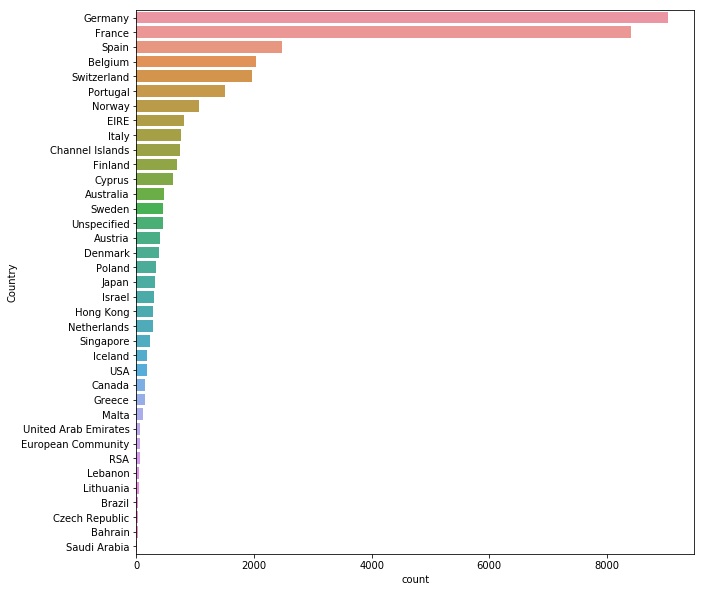

In [40]:
# Data should be desc by counts
plt.figure(figsize=(10,10))
sns.countplot(y='Country',data=df,order=df['Country'].value_counts().index)

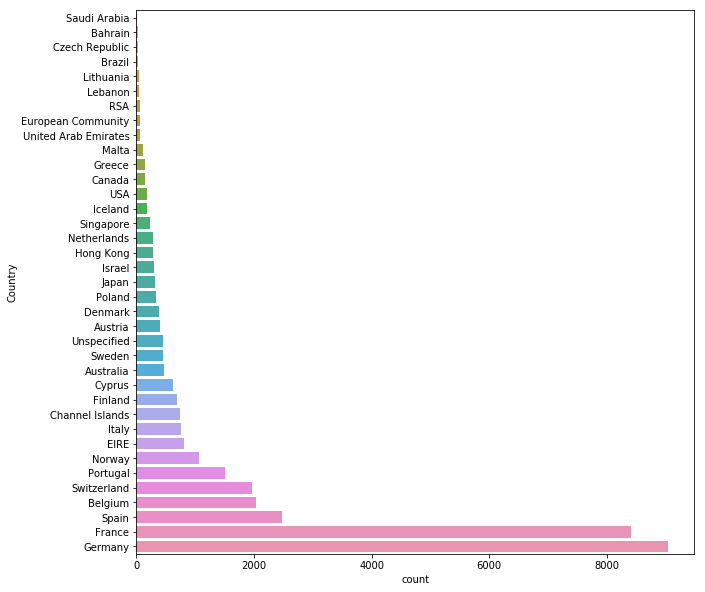

In [43]:
# if we want plot in ascending order then
plt.figure(figsize=(10,10))
sns.countplot(y='Country',data=df,order=reversed(df['Country'].value_counts().index))

In [46]:
# Missing data by feature
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

In [59]:
# only keep the transaction with customer id
df=df[df.CustomerID.notnull()] 

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33698 entries, 0 to 35115
Data columns (total 8 columns):
InvoiceNo      33698 non-null int64
StockCode      33698 non-null object
Description    33698 non-null object
Quantity       33698 non-null int64
InvoiceDate    33698 non-null object
UnitPrice      33698 non-null float64
CustomerID     33698 non-null float64
Country        33698 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 2.3+ MB


In [62]:
df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [65]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France


In [67]:
# converting customerID  from foat to int
df['CustomerID']=df.CustomerID.astype(int)

In [68]:
df.CustomerID.dtypes

dtype('int32')

In [69]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France


In [70]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [71]:
# creating intraction features
df['sale']=df.Quantity*df.UnitPrice


In [72]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sale
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0


In [76]:
# saving the dataframe into cleaned transaction 
df.to_csv('cleaned_transactions.csv')

In [77]:
df1=pd.read_csv('cleaned_transactions.csv')

In [78]:
df1.columns

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'sale'],
      dtype='object')

In [87]:
# aggrigate invoice data
invoice_data=df1.groupby('CustomerID').InvoiceNo.agg({'total_transactions':'nunique'})

E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [82]:
invoice_data.head(10)

,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8
12353,1
12354,1
12355,1
12356,3


In [88]:
# product data
product_data=df1.groupby('CustomerID').StockCode.agg({'total_product':'count','total_unique_product':'nunique'})

E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [86]:
product_data.head()

,total_product,total_unique_product
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


In [94]:
# seles invoice data
sales_data=df1.groupby('CustomerID').sale.agg({'avaerage_product_value':'mean','total_sales':'sum'})

E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [95]:
sales_data.head()

,avaerage_product_value,total_sales
CustomerID,,
12347,23.681319,4310.00
12348,57.975484,1797.24
12349,24.076027,1757.55
12350,19.670588,334.40
12352,29.482824,2506.04


In [96]:
df1.columns

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'sale'],
      dtype='object')

In [102]:
df1.drop(columns=['Unnamed: 0'],inplace=True)

In [103]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sale
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6


In [104]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'sale'],
      dtype='object')

In [106]:
# Aggrigate cart level data
cart_data=df1.groupby(['CustomerID','InvoiceNo']).sale.agg({'cart_value':'sum'})

E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [107]:
cart_data.head()

cart_value
CustomerID InvoiceNo            
12347      537626         711.79
           542237         475.39
           549222         636.25
           556201         382.52
           562032         584.91

In [108]:
# Reset index
cart_data.reset_index(inplace=True)

In [110]:
cart_data.head(10)

,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91
5,12347,573511,1294.32
6,12347,581180,224.82
7,12348,539318,892.80
8,12348,541998,227.44
9,12348,548955,367.00


In [112]:
# Aggrigate cart data at customer level
agg_cart_data=cart_data.groupby('CustomerID').cart_value.agg({'avg_cart_value':'mean','min_cart_value':'min','max_cart_value':'max'})

E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [113]:
agg_cart_data.head()

,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12347,615.714286,224.82,1294.32
12348,449.310000,227.44,892.80
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40
12352,313.255000,120.33,840.30


In [ ]:
# will all that data frame

invoice_data
product_data
sales_data
agg_cart_data

In [118]:
a=pd.merge(invoice_data,product_data,on='CustomerID')
b=pd.merge(a,sales_data,on='CustomerID')
customer_df=pd.merge(b,agg_cart_data,on='CustomerID')

In [119]:
customer_df.head()

,total_transactions,total_product,total_unique_product,avaerage_product_value,total_sales,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,23.681319,4310.00,615.714286,224.82,1294.32
12348,4,31,22,57.975484,1797.24,449.310000,227.44,892.80
12349,1,73,73,24.076027,1757.55,1757.550000,1757.55,1757.55
12350,1,17,17,19.670588,334.40,334.400000,334.40,334.40
12352,8,85,59,29.482824,2506.04,313.255000,120.33,840.30


In [120]:
customer_df.columns

Index(['total_transactions', 'total_product', 'total_unique_product',
       'avaerage_product_value', 'total_sales', 'avg_cart_value',
       'min_cart_value', 'max_cart_value'],
      dtype='object')

In [121]:
customer_df.to_csv(r'C:\Users\RITESH TIWARI\Desktop\final/analytical_transactions.csv')

In [125]:
# Loading the cleaned transaction data
cleaned_data=pd.read_csv('cleaned_transactions.csv')

In [127]:
cleaned_data.head(2)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sale
0,0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0


In [131]:
cleaned_data.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'sale'],
      dtype='object')

In [130]:
cleaned_data.drop(columns=['Unnamed: 0'],inplace=True)